* This notebook was made to compare ferry salinity with weakslip new river and weakslip jetty case.

In [1]:
import salinity
import datetime
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import matplotlib.gridspec as gridspec
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
%matplotlib inline

In [2]:
paths = {'all_reduced': '/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/',
        'jetty': '/data/jieliu/MEOPAR/river-treatment/oct8_10jetty1e0605/',
        'WeakSlipRiver':'/data/jieliu/MEOPAR/parameters/oct8_101e0605shlat0.2/',
          'WeakSlipJetty':'/data/jieliu/MEOPAR/parameters/oct8_10jettyshlat0.2/'}
grid10 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea10.nc')

In [3]:
#subset
ist=1
ien=398
jst=1
jen=898
x=np.arange(ist,ien)
y=np.arange(jst,jen)
st=3

In [4]:
def salinity_plot(run_date, saline, run_lower, run_upper, path_ssh,t):
    """This function was made to plot ferry 1.5m with different cases vs ferry salinity
        and there differences. should consider set up value_mean_4rd as {}"""
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_allredu, value_mean_4rd_allredu, \
    value_mean_aveallredu, value_mean_ave4allredu,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['all_reduced'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_weakallredu, value_mean_4rd_weakallredu, \
    value_mean_weakaveallredu, value_mean_weakave4allredu,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['WeakSlipRiver'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_jetty, value_mean_4rd_jetty, \
    value_mean_avejetty, value_mean_ave4jetty,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['jetty'],run_lower,run_upper)
    
    lon_model, lat_model, lon1_model, lat1_model,\
    value_mean_3rd_weakjetty, value_mean_4rd_weakjetty, \
    value_mean_weakavejetty, value_mean_weakave4jetty,\
    salinity11, salinity1_2_4, date_str = salinity.salinity_fxn\
    (saline, run_date, paths['WeakSlipJetty'],run_lower,run_upper)

    fig = plt.figure(figsize=(15,12))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])
    gs.update(wspace=0.17, hspace=0.3)
    ax0 = fig.add_subplot(gs[0, 0]); ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[1, 0]); axx= [ax0,ax1]; 
    lable_all = ['all_reduced', 'jetty'];
    ax0.plot(lon_model,value_mean_3rd_allredu,'Indigo',linewidth=2, marker='*', label='all_redu')
    ax0.plot(lon_model,value_mean_3rd_weakallredu,'blue',linewidth=2, marker='o', label='weakslip_redu')
    ax0.plot(lon1_model,salinity1_2_4,'DarkGreen', linewidth=2, marker = '^',label="Observed")
    ax1.plot(lon_model,value_mean_3rd_jetty,'Olive',linewidth=2, marker='*', label='jetty')
    ax1.plot(lon_model,value_mean_3rd_weakjetty,'Maroon',linewidth=2, marker='o', label='weakslip_jetty')
    ax1.plot(lon1_model,salinity1_2_4,'DarkGreen', linewidth=2, marker = '^',label="Observed")
    
    for ax, l_a in zip(axx,lable_all):
        ax.set_xlim(-124, -123)
        ax.set_xlabel('Longitude', fontsize = 16)
        plt.setp(ax.get_xticklabels(), fontsize=16)
        plt.setp(ax.get_yticklabels(), fontsize=16)
        ax.legend(loc = 'best',fontsize = 16)
        ax.set_ylim(0, 30)
        ax.set_ylabel('Practical Salinity', fontsize = 16)
        if run_lower.hour ==0 or run_lower.hour ==5 or run_lower.hour == 14 or run_lower.hour == 19 :
            ax.set_title('1.5m salinity at '+ run_lower.replace(hour = run_lower.hour+2,minute = 30)\
                      .strftime('%d-%b-%Y %H:%M') +' with '+l_a+' case', fontsize = 16)
        else:
            ax.set_title('1.5m salinity at '+ run_lower.replace(minute = 30).\
                      strftime('%d-%b-%Y %H:%M')+' with '+l_a+' case', fontsize = 16)
    ## add ssh plot
    ssh,tt, hour = salinity.get_ssh_in_model(run_date, path_ssh,t)
    ax2.plot(tt[:],ssh[:, 466,329],'-k', linewidth = 2.5)
    ax2.plot(tt[t],ssh[t, 466,329], color = 'Maroon',marker='*', markersize = 16)
       
    ax2.set_title('Modelled water level at Point Atkinson on '\
                                       + tt[t].strftime('%d-%b-%Y %H:%M'), fontsize=16)
    ax2.set_xlabel('time', fontsize=16)
    ax2.set_ylabel('Water level (m)')
    plt.setp(ax2.get_xticklabels(), fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    return fig 

# Oct8

In [5]:
run_date = datetime.datetime(2014,10,8)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141007.mat')

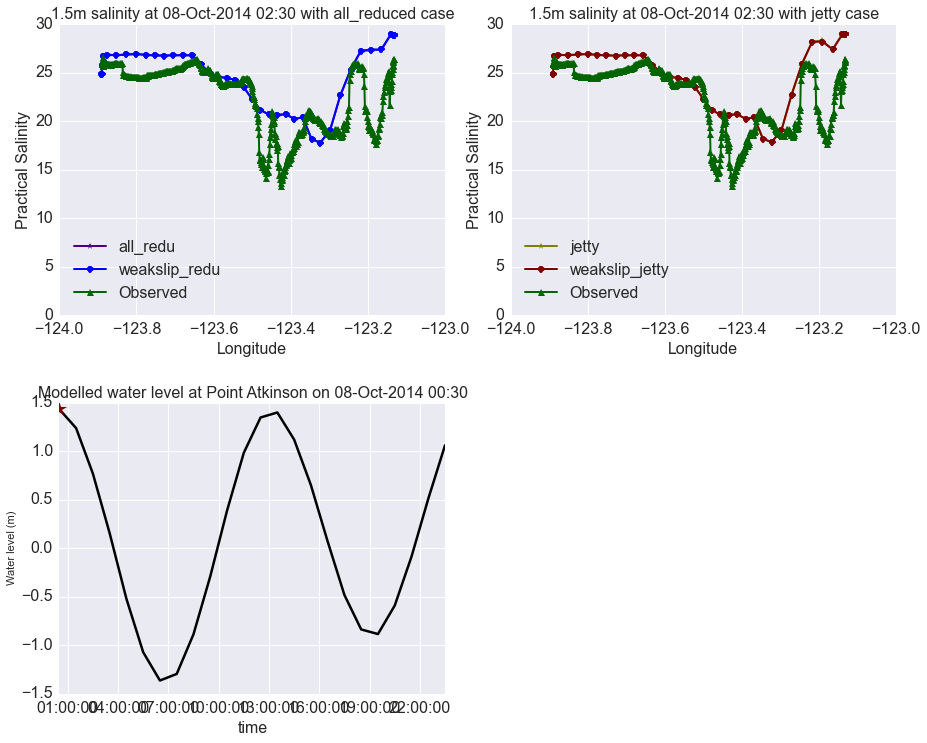

In [6]:
run_lower = run_date.replace(hour = 0, minute = 45)
run_upper = run_date.replace(hour = 3, minute =15)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 0)

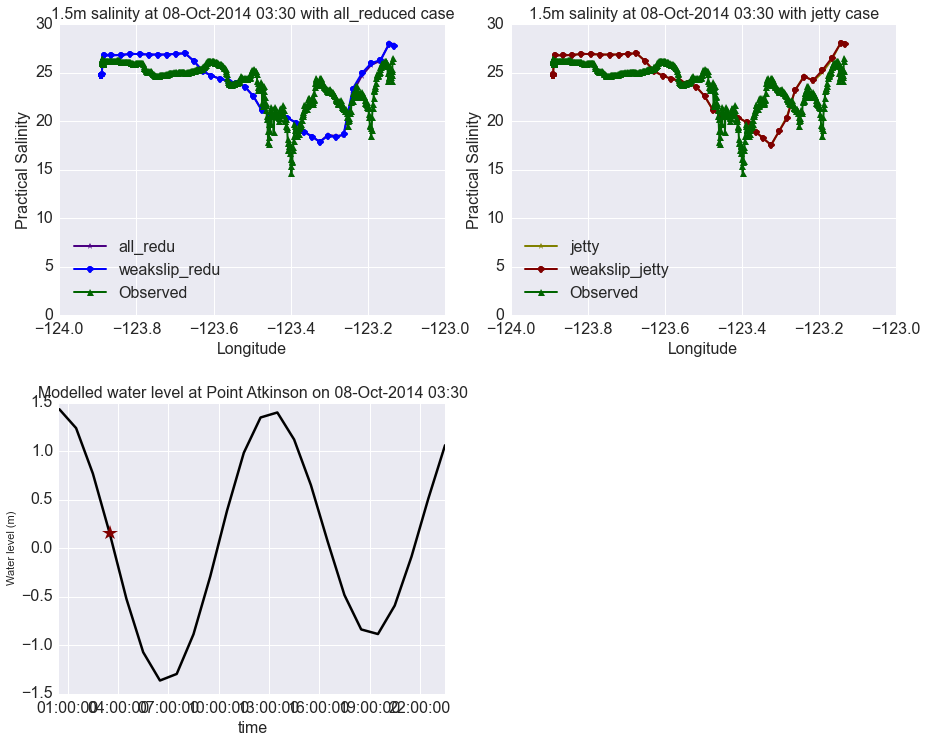

In [7]:
run_lower = run_date.replace(hour = 3, minute = 15)
run_upper = run_date.replace(hour = 5, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 3)

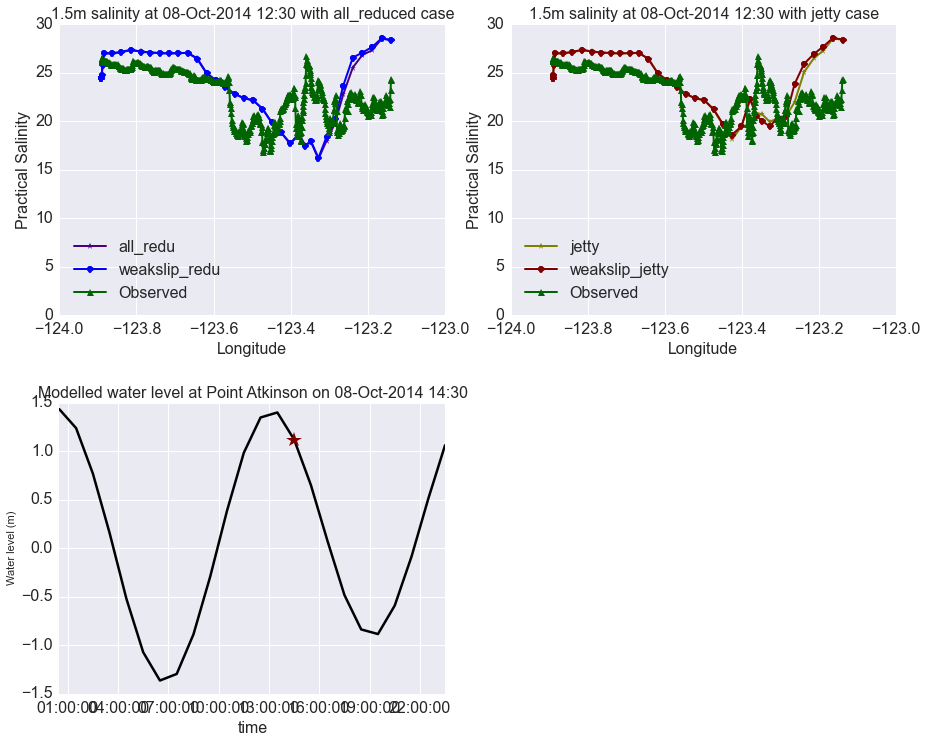

In [8]:
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141008.mat')
run_lower = run_date.replace(hour = 12, minute = 22)
run_upper = run_date.replace(hour = 14, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 14)

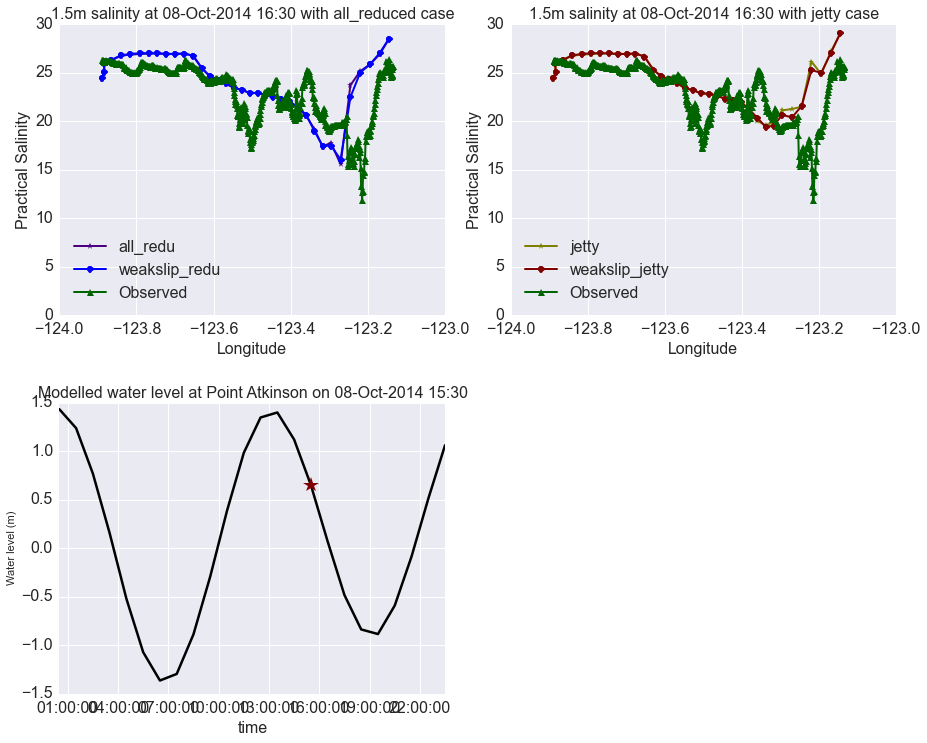

In [9]:
run_lower = run_date.replace(hour = 14, minute = 45)
run_upper = run_date.replace(hour = 16, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 15)

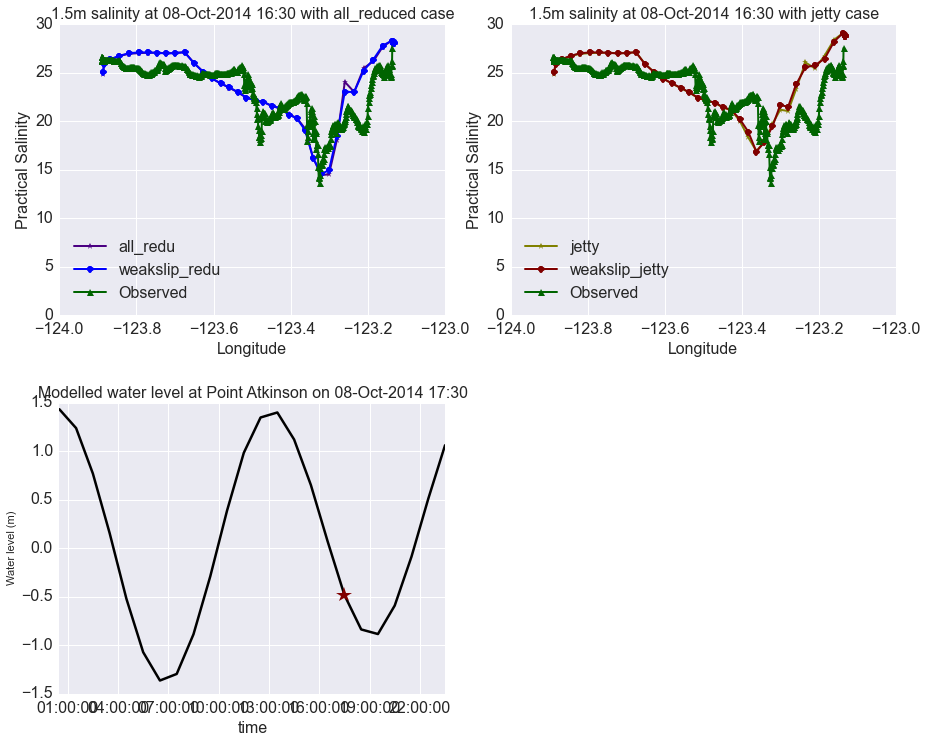

In [10]:
run_lower = run_date.replace(hour = 16, minute = 45)
run_upper = run_date.replace(hour = 19, minute =15)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 17)

# Oct9

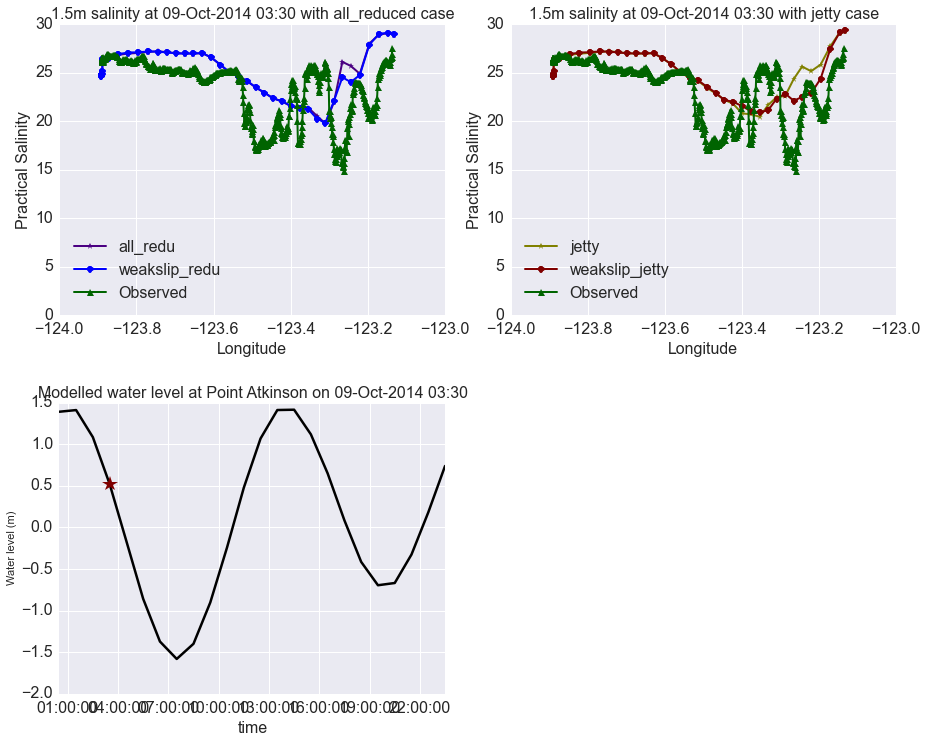

In [11]:
run_date = datetime.datetime(2014,10,9)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141008.mat')
run_lower = run_date.replace(hour =3, minute = 15)
run_upper = run_date.replace(hour = 5, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 3)

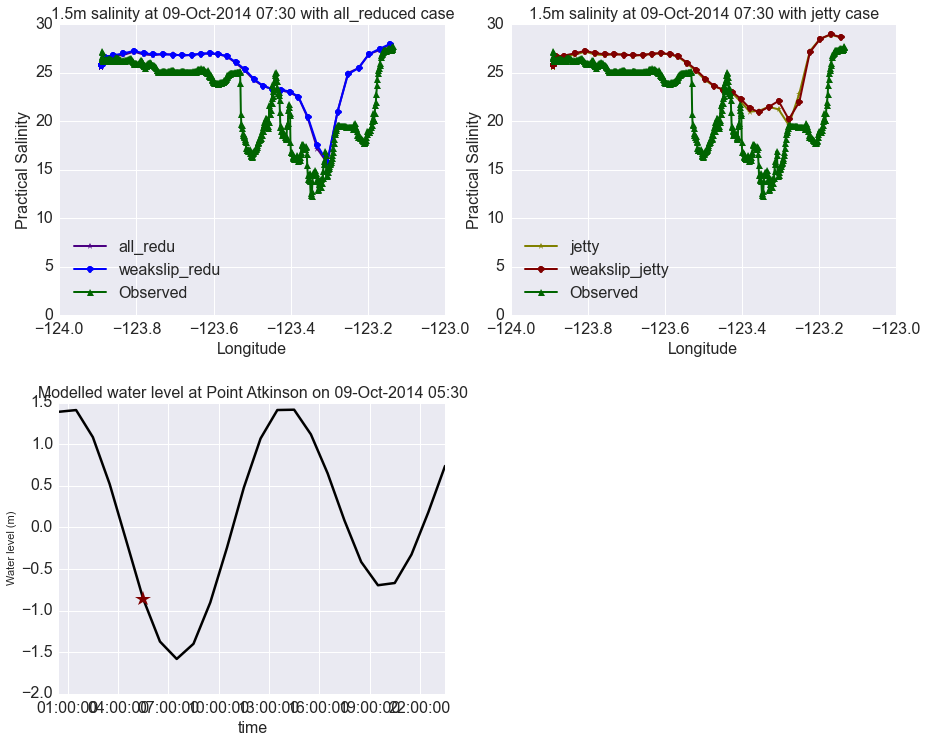

In [12]:
run_lower = run_date.replace(hour =5, minute = 15)
run_upper = run_date.replace(hour = 7, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 5)

# Oct10

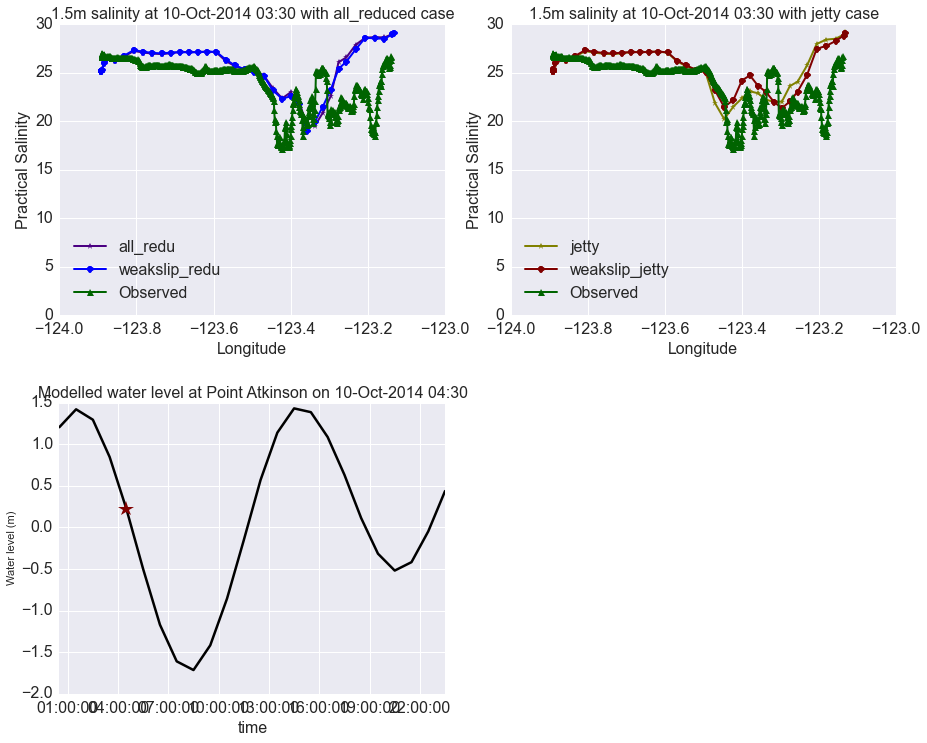

In [13]:
run_date = datetime.datetime(2014,10,10)
saline=sio.loadmat('/ocean/jieliu/research/meopar/autodataupdate/ferrydata/SBE1920141009.mat')
run_lower = run_date.replace(hour =3, minute = 15)
run_upper = run_date.replace(hour = 5, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 4)

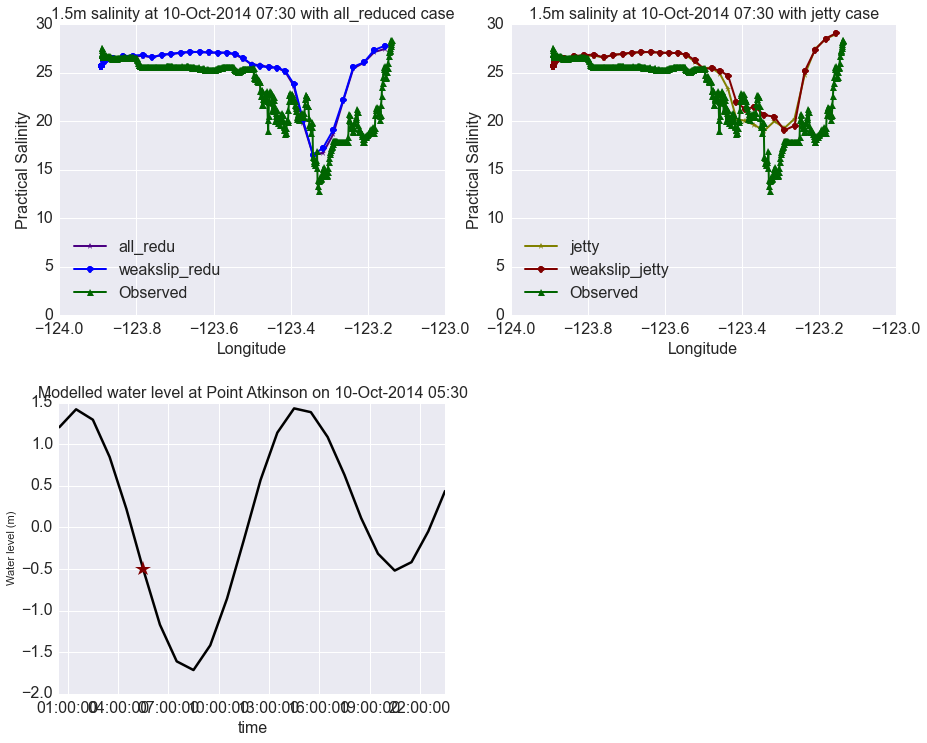

In [14]:
run_lower = run_date.replace(hour =5, minute = 15)
run_upper = run_date.replace(hour = 7, minute =45)
fig = salinity_plot(run_date,saline, run_lower,run_upper,paths['jetty'], 5)